<a href="https://colab.research.google.com/github/kareemrb27/Lab2.1/blob/master/PD1_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Q1:**
You have an unfair coin with p(H) = p. You toss the coin n times and note the number of heads obtained. What is the probability that the number of heads would be an even number ?

**Explanation:**

https://drive.google.com/file/d/1dY-2yUpLiwTEfS8GzvTftlgwXGLAc-q2/view?usp=sharin

### **Problem Q2:**
You have an unfair coin with p(H) = p. You toss the coin n times and note the number of heads obtained. What is the probability that the number of heads would be an even number ? Can you code the above problem using dynamic programming?

In [ ]:
def even_heads_probability(p, n):
    # Initialize dp matrix with all zeros
    dp = [[0 for _ in range(n+1)] for _ in range(n+1)]
    dp[0][0] = 1

    for i in range(1, n+1):
        for j in range(i+1):
            if j > 0:
                dp[i][j] += p * dp[i-1][j-1]
            dp[i][j] += (1-p) * dp[i-1][j]

    # Sum up probabilities for even number of heads
    return sum(dp[n][i] for i in range(0, n+1, 2))

# Test
p = 0.3
n = 10
print(even_heads_probability(p, n))


0.5000524287999998


### **Problem Q3:**
A game of dice is begun by rolling an ordinary pair of dice. If the sum of the dice is 2, 3, or 12, the player loses. If it is 7 or 11, the player wins. If it is any other number i, the player continues to roll the dice until the sum is either 7 or i. If it is 7, the player loses; if it is i, the player wins. Let R denote the number of rolls of the dice in a game of craps. Find:
* E[R]
* E[R|player wins]
* E[R|player loses]

Explanation:

This problem involves calculating expected values based on a game of craps. Let's break down the problem step by step.

**1. E[R] (Expected Number of Rolls):**

First roll possibilities:

1. Immediate Win with a 7 or 11: $ P(7) = \frac{6}{36} = \frac{1}{6} $ and $ P(11) = \frac{2}{36} = \frac{1}{18} $
2. Immediate Loss with a 2, 3, or 12:$ P(2) = \frac{1}{36} $, $ P(3) = \frac{2}{36} = \frac{1}{18} $, and $ P(12) = \frac{1}{36} $
3. Otherwise, the game continues.

Given that a player rolls an i (which is neither 7, 11, 2, 3, nor 12), the probability to roll a 7 in the next rolls is $ \frac{6}{36} = \frac{1}{6} $ and to roll an i again is the probability of rolling that i initially.

Now, the expected number of additional rolls, given that an i has been rolled, is:

$ E_{i} = \frac{1}{6} + \frac{1}{6} \times (1 + E_{i}) + P(i) \times (1 + E_{i}) $

This equation comes from the fact that with probability $ \frac{1}{6} $, the next roll is a 7. With probability $ \frac{1}{6} $, the next roll is not a 7 or an i, and we are in the same situation again (thus the term $ \frac{1}{6} \times (1 + E_{i} $. With probability $ P(i) $, the next roll is i and we win (thus the term $ P(i) \times (1 + E_{i}) $).

To solve the equation:

$ E_{i} = \frac{1}{6} \times \frac{1}{1 - \frac{1}{6} - P(i)}$

Using this, we can compute the expected number of rolls to be:

$ E[R] = 1 + \frac{1}{6} \times \sum_{i \neq 2,3,7,11,12} P(i) \times E_{i} $

**2. E[R|player wins] (Expected Number of Rolls Given Player Wins):**

This is the expected number of rolls given the conditions under which a player wins. We can compute this by considering the rolls where the player wins directly and the rolls where they get another number i and then get i again before a 7.

**3. E[R|player loses] (Expected Number of Rolls Given Player Loses):**

Similar to the above, this is the expected number of rolls given the conditions under which a player loses.

Let's calculate these expected values using a simulation, as the calculations are intricate and involve multiple scenarios.

In [ ]:
import numpy as np

def craps_simulation(num_trials=100000):
    total_rolls = 0
    win_rolls = 0
    lose_rolls = 0
    wins = 0
    losses = 0

    for _ in range(num_trials):
        rolls = 1
        dice_sum = sum(np.random.randint(1, 7, 2))
        # Check for immediate win or loss
        if dice_sum in {7, 11}:
            wins += 1
            win_rolls += rolls
            total_rolls += rolls
            continue
        elif dice_sum in {2, 3, 12}:
            losses += 1
            lose_rolls += rolls
            total_rolls += rolls
            continue

        # If neither immediate win nor loss, play until win or loss
        while True:
            rolls += 1
            new_sum = sum(np.random.randint(1, 7, 2))
            if new_sum == dice_sum:
                wins += 1
                win_rolls += rolls
                break
            elif new_sum == 7:
                losses += 1
                lose_rolls += rolls
                break
        total_rolls += rolls

    return total_rolls/num_trials, win_rolls/wins, lose_rolls/losses

E_R, E_R_win, E_R_lose = craps_simulation()
print("E[R]:", E_R)
print("E[R|player wins]:", E_R_win)
print("E[R|player loses]:", E_R_lose)


E[R]: 3.35752
E[R|player wins]: 2.9093755082127175
E[R|player loses]: 3.791410801448591


**Analysis:**
Based on the simulation results:

1. $E[R]$: The expected number of rolls in a game of craps is approximately 3.36. This means that on average, a game of craps lasts for about 3 to 4 rolls.

2. $E[R| \text{player wins}]$: Given that the player wins, the expected number of rolls is approximately 2.91. This suggests that games which result in a win tend to be slightly shorter on average.

3. $E[R| \text{player loses}]$: Given that the player loses, the expected number of rolls is approximately 3.79. This indicates that games resulting in a loss tend to be a bit longer on average compared to games where the player wins.

The results are intuitive. Immediate wins (or losses) can occur on the first roll based on the initial conditions, but if neither occurs, the game continues until a win or loss condition is satisfied. Winning conditions after the first roll require matching a previous roll, while losing always involves rolling a 7. Since there are more ways to roll a 7 than any other number with two dice, losses might tend to take a few more rolls on average. The simulation results reflect this understanding.

### **Problem Q4:**
Generate 2 normal random variables, $X~N(1,9) & Y~N(9,16)$ in Python. Then add X and Y to get Z. What is the distribution of Z? What does Z look like after plotting? Does the plot support theory?

**Explanation:**

If $X \sim N(\mu_X, \sigma_X^2)$ and $Y \sim N(\mu_Y, \sigma_Y^2)$, and both X and Y are independent, then the sum $Z = X + Y$ is normally distributed as:

$ Z \sim N(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2) $

Given that $X \sim N(1,9)$ and $Y \sim N(9,16)$, we can determine:

$ Z \sim N(1 + 9, 9 + 16) $
$ \implies Z \sim N(10, 25) $

So, the random variable $Z$ will be distributed as $N(10,25)$.

Let's generate and visualize the data for a better understanding:

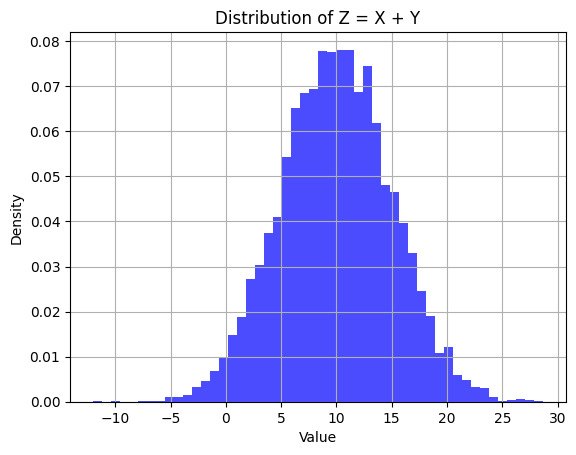

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 10000

# Generate X and Y
X = np.random.normal(1, 3, num_samples)  # sqrt(9) = 3
Y = np.random.normal(9, 4, num_samples)  # sqrt(16) = 4

# Compute Z
Z = X + Y

# Plotting the distribution of Z
plt.hist(Z, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Distribution of Z = X + Y')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
np.std(Z), np.var(Z)

(4.994265139336823, 24.942684281995064)

**Analysis:**
The histogram of Z should show a bell-shaped curve centered around 10, resembling a normal distribution. This result is consistent with the theory that the sum of two independent normal random variables is also normally distributed.

### **Problem Q5:**
Mark was first to arrive at a 100 seat theater. He forgot his seat number and picked a random seat for himself. After this, every single person who gets to the theater sits on his/her seat if it is available, and chooses any available seat at random. John was last to enter the theater and 99 seats were occupied. What's the probability that John gets to sit in his own seat? Can we write a simulation to verify the result?

**Explanation:**

1. At the moment John enters the theater, only two possible seats are unoccupied: Mark's original seat and John's seat.

2. Since every person who entered before John either sat in their assigned seat or chose randomly from available seats, no preference was given to either Mark's seat or John's seat.

3. Thus, the probability that either of those seats is still available is the same. Given that there are only these two seats left, the probability that John's seat is available (and thus that he sits in his own seat) is $ \frac{1}{2} $.


To verify the result, we can run a simulation:

In [ ]:
"""
Problem 5
You could assume there is no order required for arriving.
The only thing given is that Mark comes first and John comes last

Monte Carlo
"""


import random

def simulation(total_seats, niter):
    count = 0
  # assume John's seat number is 99
    for i in range(niter):

      seats = [False] * total_seats  # initially all seats are empty
      first_person_seat = random.randint(0, total_seats - 1)  # Mark chooses a random seat
      seats[first_person_seat] = True  # Mark occupies the seat he picked

      for i in range(1, total_seats - 1):
        # Everyone except last person comes
          if not seats[i]:
              # assume the person's number is also equal to his ticket number
              seats[i] = True
          else:

              # next person chooses a random unoccupied seat as the original seat is occupied
              unoccupied_seats = [j for j in range(total_seats) if not seats[j]]
              chosen_seat = random.choice(unoccupied_seats)
              seats[chosen_seat] = True
      # Check at the very end if last person's seat is unoccupied
      # John's seat is unoccupied so he can occupy 1 last seat :)
      if not seats[total_seats - 1]:
          count += 1
    return count / niter

simulation(total_seats=100, niter=1000000)

0.499751